In [1]:
import os
os.chdir('/Users/mac/Desktop/Work Space/Safe PM 2')

In [2]:
from datamanager import DataManager
from trainer import Trainer
from tester import Tester
from viz import Viz

import numpy as np
import torch
import utils

np.random.seed(1)
torch.manual_seed(1)
utils.SAVE_DIR += f"/seed{1}"

In [32]:
train_start = "2014-01-02"
train_end = "2020-12-31"
test_start = "2020-12-31"
test_end = "2021-12-31"

paths = ["Data/" + s for s in ["REGN", "TIGO"]]
datamanager = DataManager(paths, train_start, train_end, test_start, test_end)
train_data_tensor, test_data_tensor = datamanager.get_data_tensor()

K = train_data_tensor.shape[2]
F = train_data_tensor.shape[1]-1

In [56]:
parameters = {
            "lr1":1e-4, 
            "lr2":1e-3, 
            "tau":0.005, 
            "delta":0., 
            "alpha":7.0,
            "gamma":0.9,
            "K":K, "F":F, 
            "fee":0.0, 
            "term":30,
            "freq":500,
            "cons":True,
            "balance":12000, 
            "episode":2000,
            "min_trading_price":0,
            "max_trading_price":400,
            "batch_size":128,
            "memory_size":10000
            }

In [58]:
trainer = Trainer(**parameters, data=train_data_tensor)
trainer.train()
trainer.save_model(utils.SAVE_DIR + "/net.pth")

In [7]:
datamanager.paths = ["Data/" + s for s in ["AAPL", "COST"]]
test_data_tensor2 = datamanager.get_data_tensor()[1]

In [ ]:
tester = Tester(**parameters, data=test_data_tensor)
tester.test(utils.SAVE_DIR + "/net.pth")

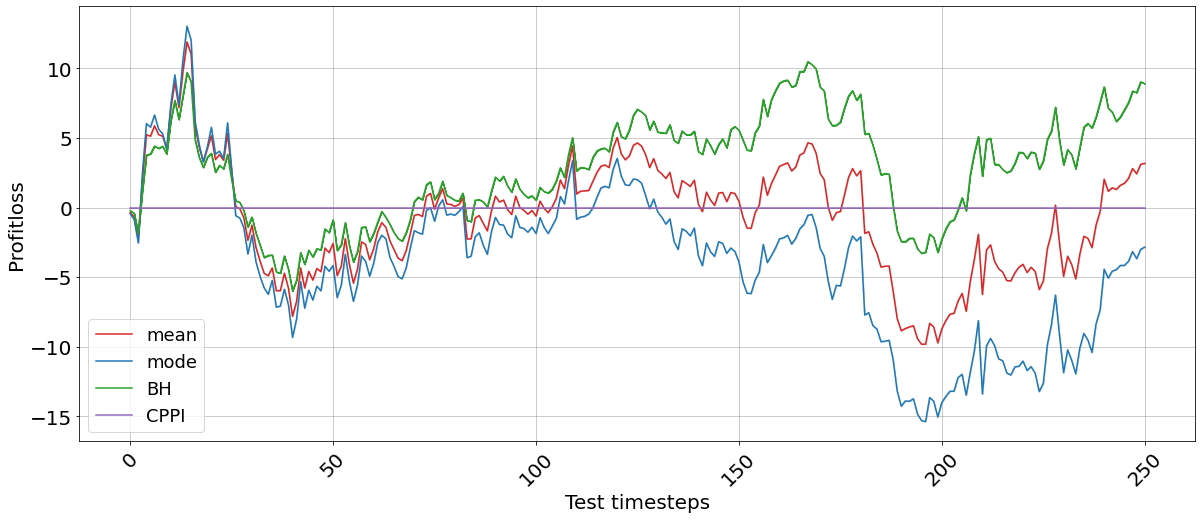

mean profitloss: 3.185801808008737
mode profitloss: -2.833350611730157
BH profitloss: 8.91436800425971
CPPI profitloss: 0.0


In [61]:
viz = Viz()
viz.show(10,10, size=(20,8))